In [1]:
import sys
sys.path.insert(0, '../../../network')
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [4]:
params = np.load("./ctx_params.npz", allow_pickle=True) 
N, sequences, cp, cw, A = params['N'], params['sequences'], params['cp'], params['cw'], params['A']
patterns_ctx = np.stack([s.inputs for s in sequences[0]])
patterns = [patterns_ctx[0]]

In [5]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
# d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx], cp, cw, A, patterns, plasticity)
network = RateNetwork([ctx], J, formulation=1, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx


In [7]:
init_inputs = [patterns[0][0]]
# input_patterns = [p[0] for p in patterns]

T=5 #ms
mouse = ReachingTask()
network.simulate(T, init_inputs[0])

INFO:network:Integrating network dynamics
[========================================================================] 100%


In [8]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])

INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 197.20it/s]


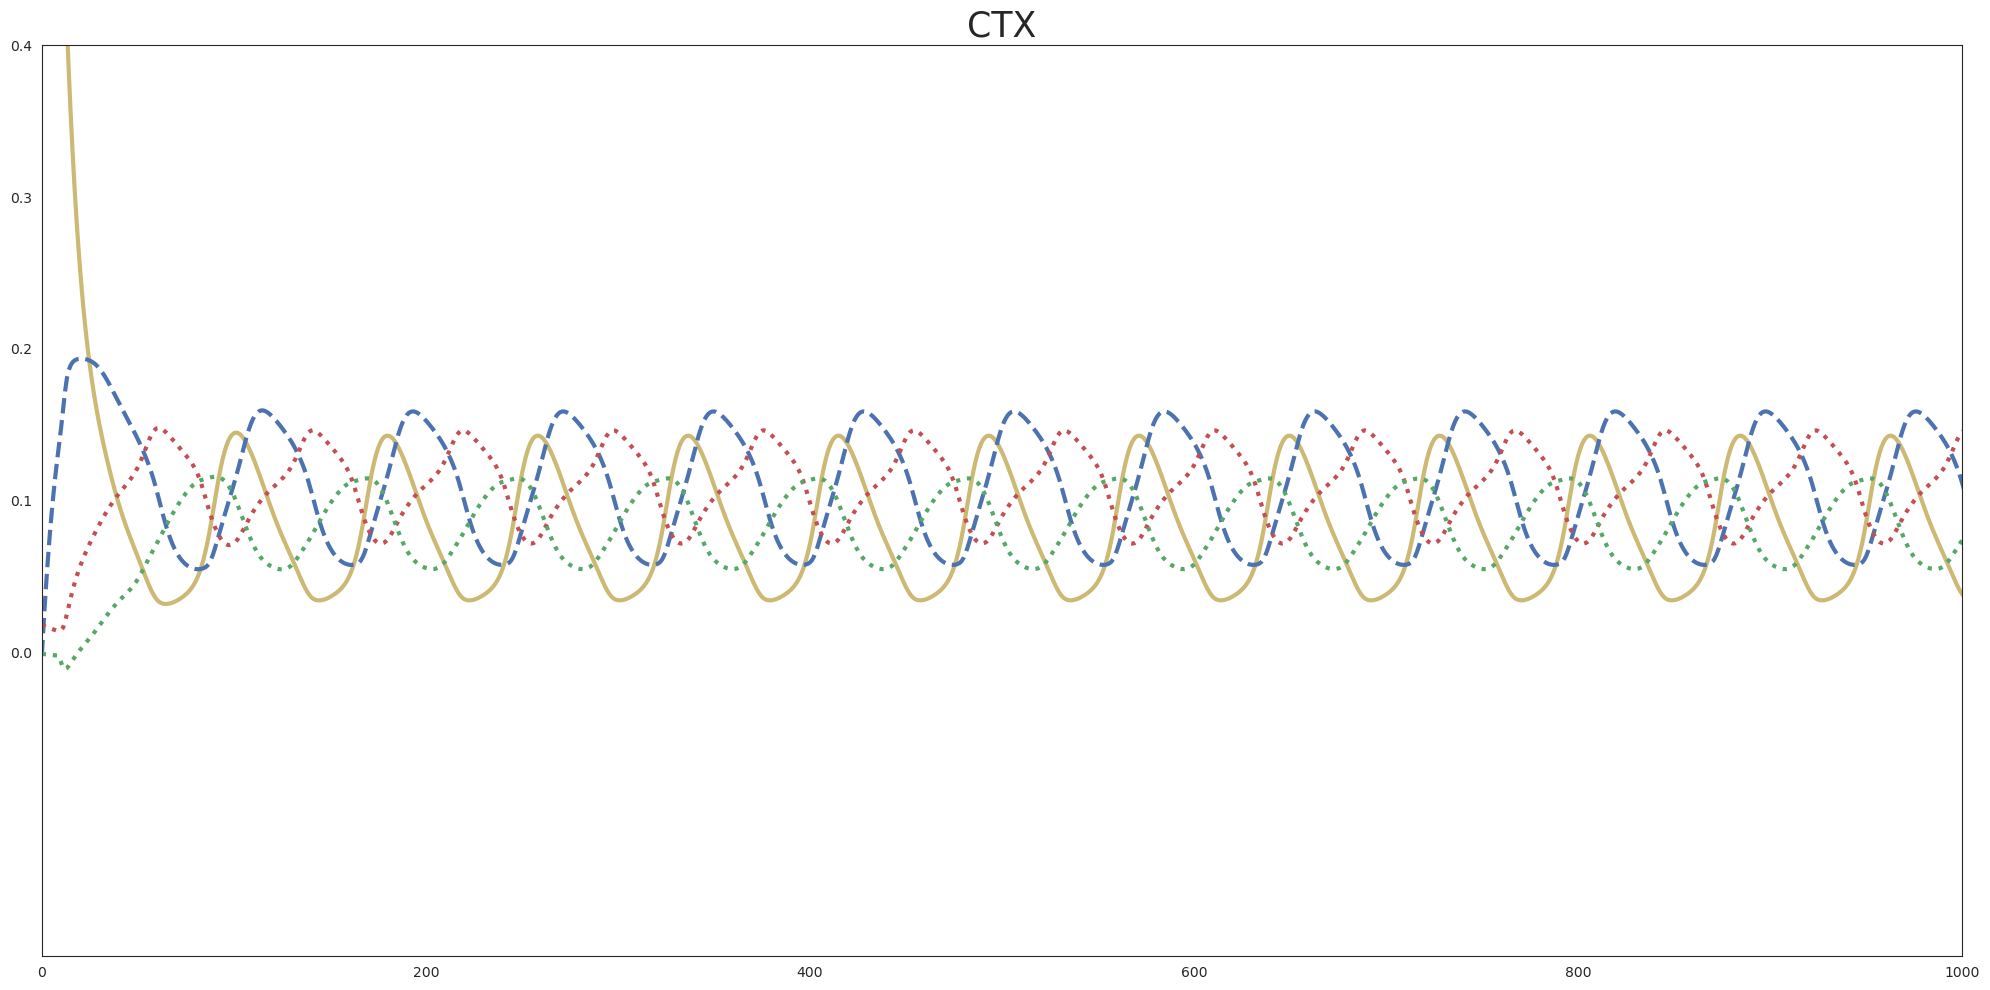

In [9]:
sns.set_style('white') 
colors = sns.color_palette('deep')

fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes.plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes.plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes.plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes.plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
axes.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes.set_title("CTX", fontsize=25)
plt.setp(axes, xlim=(0, 1000))
plt.setp(axes, ylim=(-.2, .4))
plt.show()